In [1]:
import pandas as pd

In [2]:
df_income = pd.read_csv(r"C:\train.csv")

In [3]:
df_income.head()

,age,class_of_worker,industry_code,occupation_code,education,wage_per_hour,enrolled_in_edu_inst_lastwk,marital_status,major_industry_code,major_occupation_code,...,country_father,country_mother,country_self,citizenship,business_or_self_employed,fill_questionnaire_veteran_admin,veterans_benefits,weeks_worked_in_year,year,income_level
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,-50000
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,-50000
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,-50000
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,-50000
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,-50000


In [4]:
df_income.shape

(199523, 41)

In [5]:
df_income.columns

Index(['age', 'class_of_worker', 'industry_code', 'occupation_code',
       'education', 'wage_per_hour', 'enrolled_in_edu_inst_lastwk',
       'marital_status', 'major_industry_code', 'major_occupation_code',
       'race', 'hispanic_origin', 'sex', 'member_of_labor_union',
       'reason_for_unemployment', 'full_parttime_employment_stat',
       'capital_gains', 'capital_losses', 'dividend_from_Stocks',
       'tax_filer_status', 'region_of_previous_residence',
       'state_of_previous_residence', 'd_household_family_stat',
       'd_household_summary', 'migration_msa', 'migration_reg',
       'migration_within_reg', 'live_1_year_ago', 'migration_sunbelt',
       'num_person_Worked_employer', 'family_members_under_18',
       'country_father', 'country_mother', 'country_self', 'citizenship',
       'business_or_self_employed', 'fill_questionnaire_veteran_admin',
       'veterans_benefits', 'weeks_worked_in_year', 'year', 'income_level'],
      dtype='object')

In [16]:
pd.set_option('display.max_columns',42)

In [6]:
# df_income.head()

income_features=df_income[['age','education','wage_per_hour','marital_status','sex','tax_filer_status','country_self','citizenship','weeks_worked_in_year','income_level']]

In [48]:
income_features.nunique()

age                       91
education                 17
wage_per_hour           1240
marital_status             7
sex                        2
tax_filer_status           6
country_self              42
citizenship                5
weeks_worked_in_year      53
income_level               2
dtype: int64

In [13]:
# converting -50000 to 0 and 50000 to 1

income_features['income_level'].replace(to_replace=[-50000, 50000], value=[0, 1], inplace=True)

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [56]:
income_features['income_level'].value_counts()

0    187141
1     12382
Name: income_level, dtype: int64

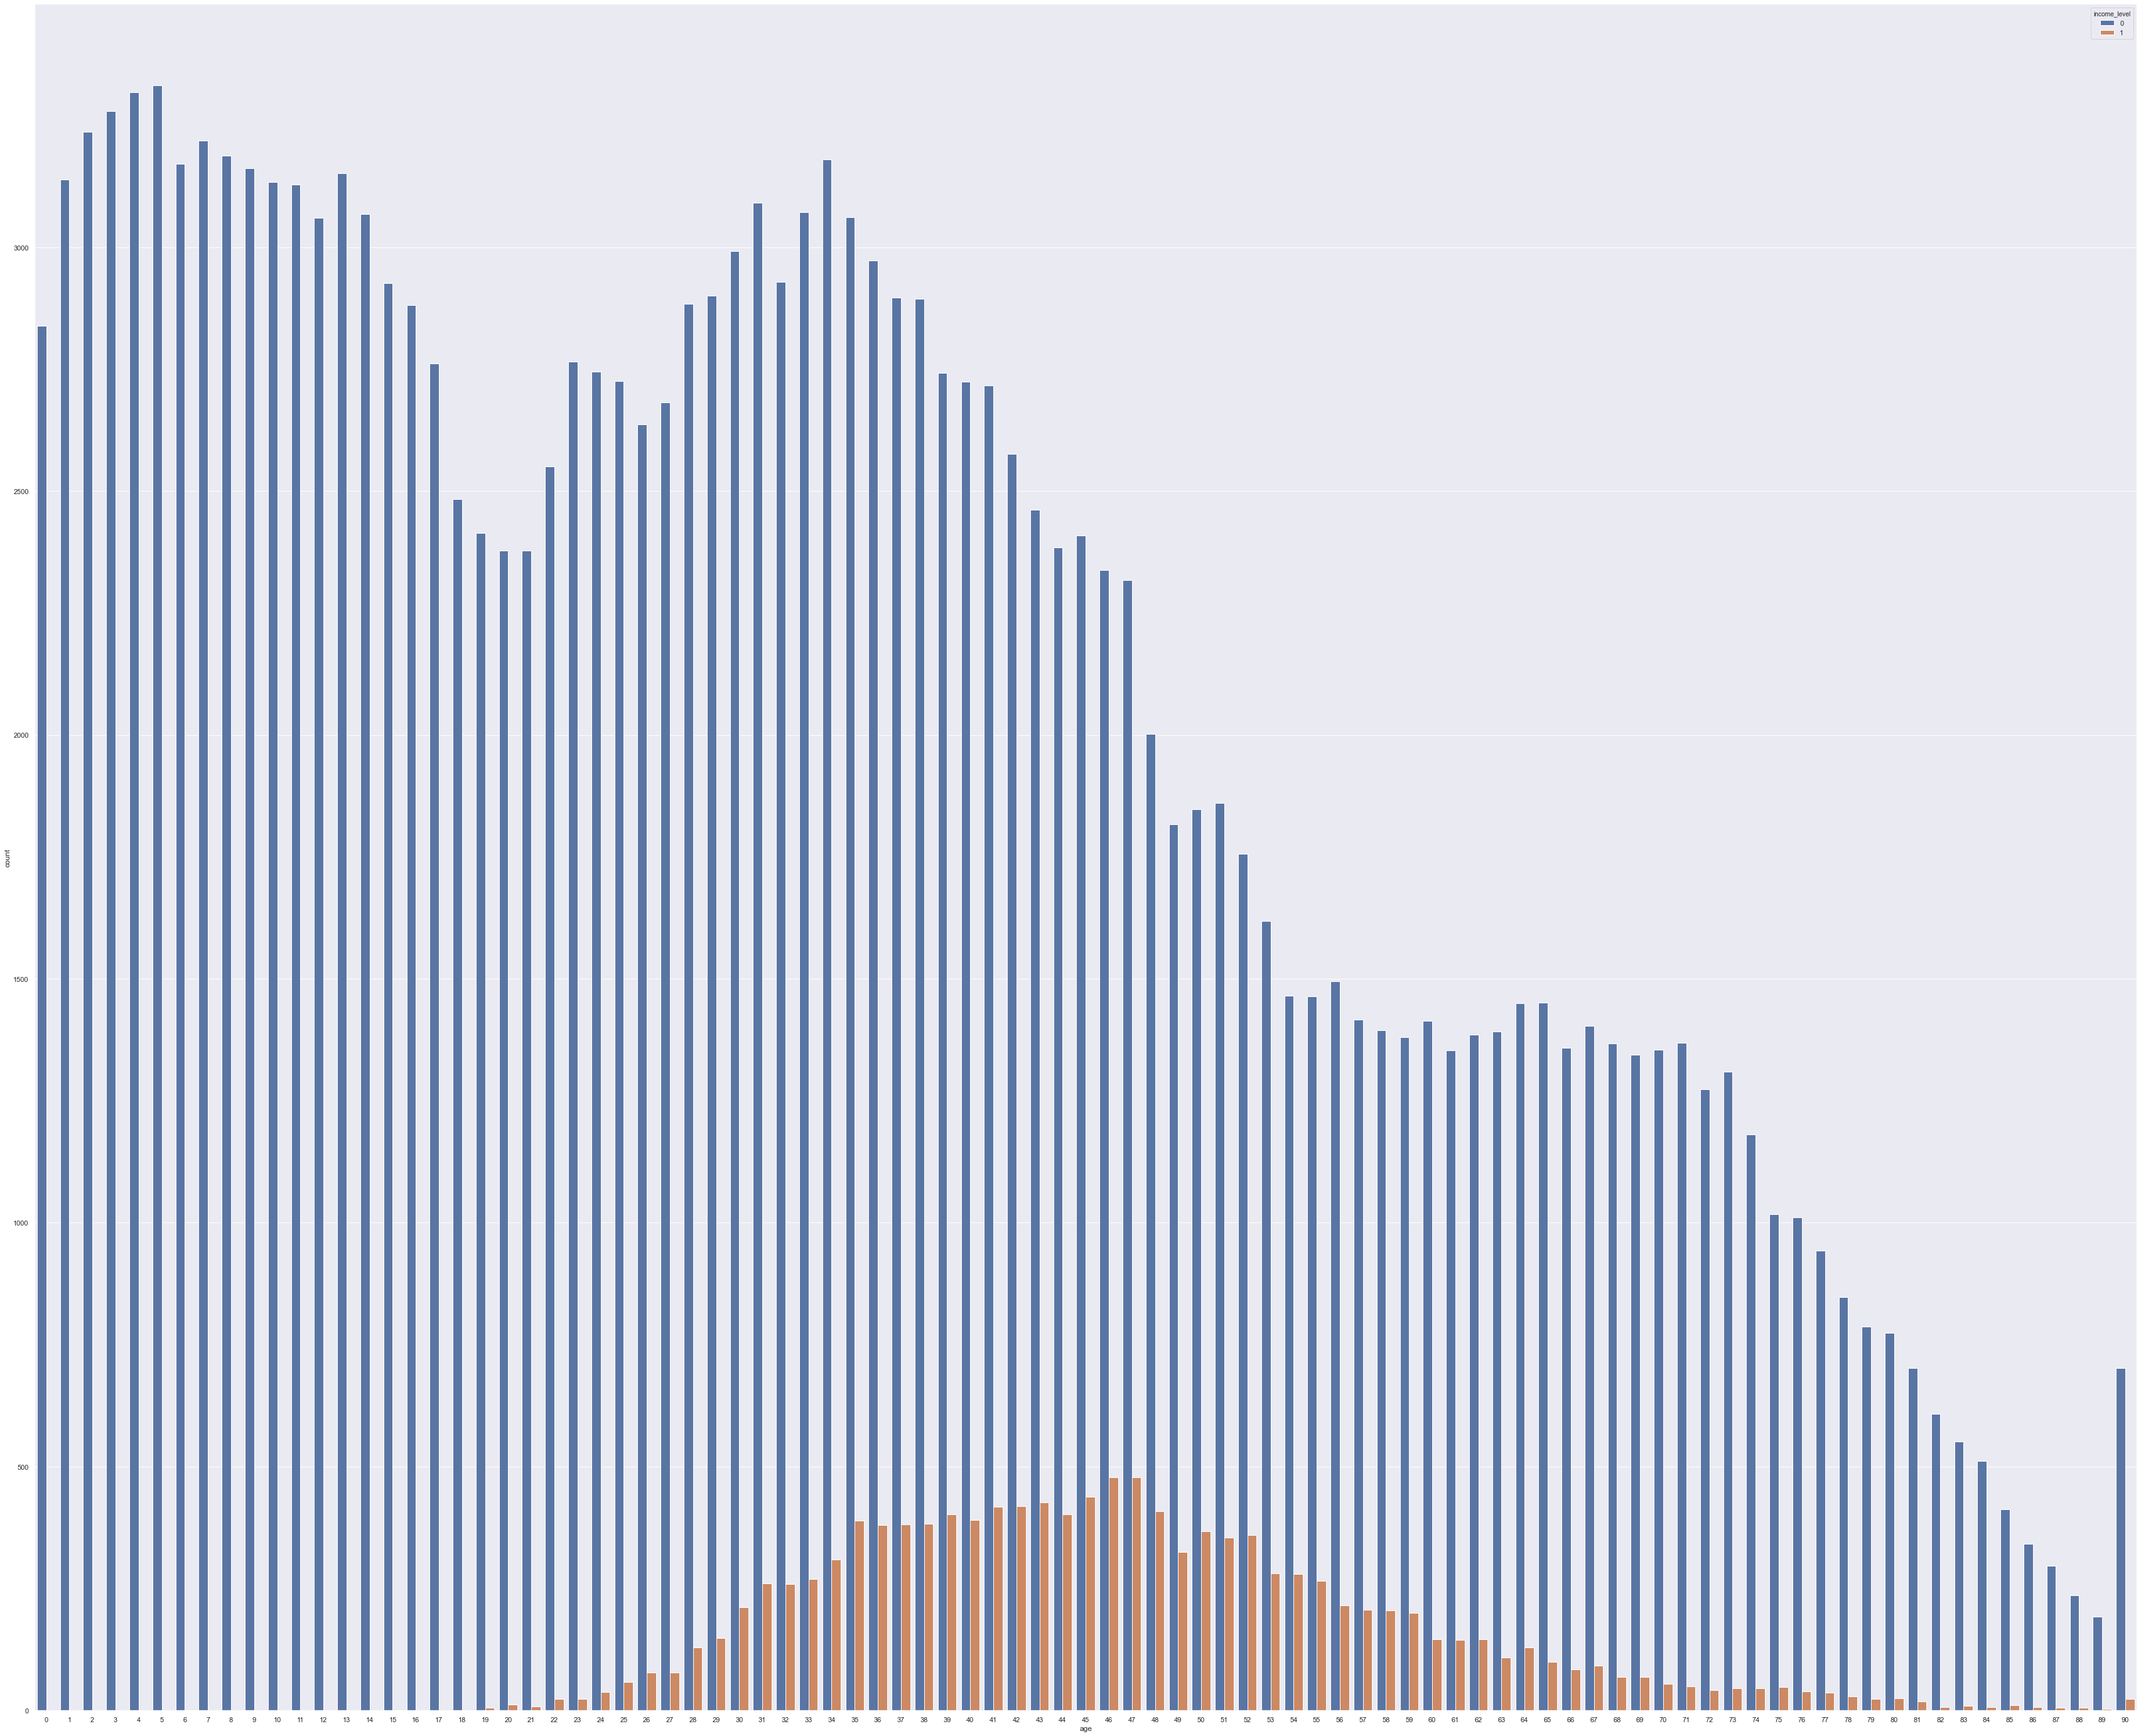

In [36]:
# age and income_level 
import seaborn as sns
sns.set(rc={'figure.figsize':(60,50)})
sns.countplot(x='age',hue='income_level',data=income_features)
# sns.countplot(x='education',hue='income_level',data=income_features)

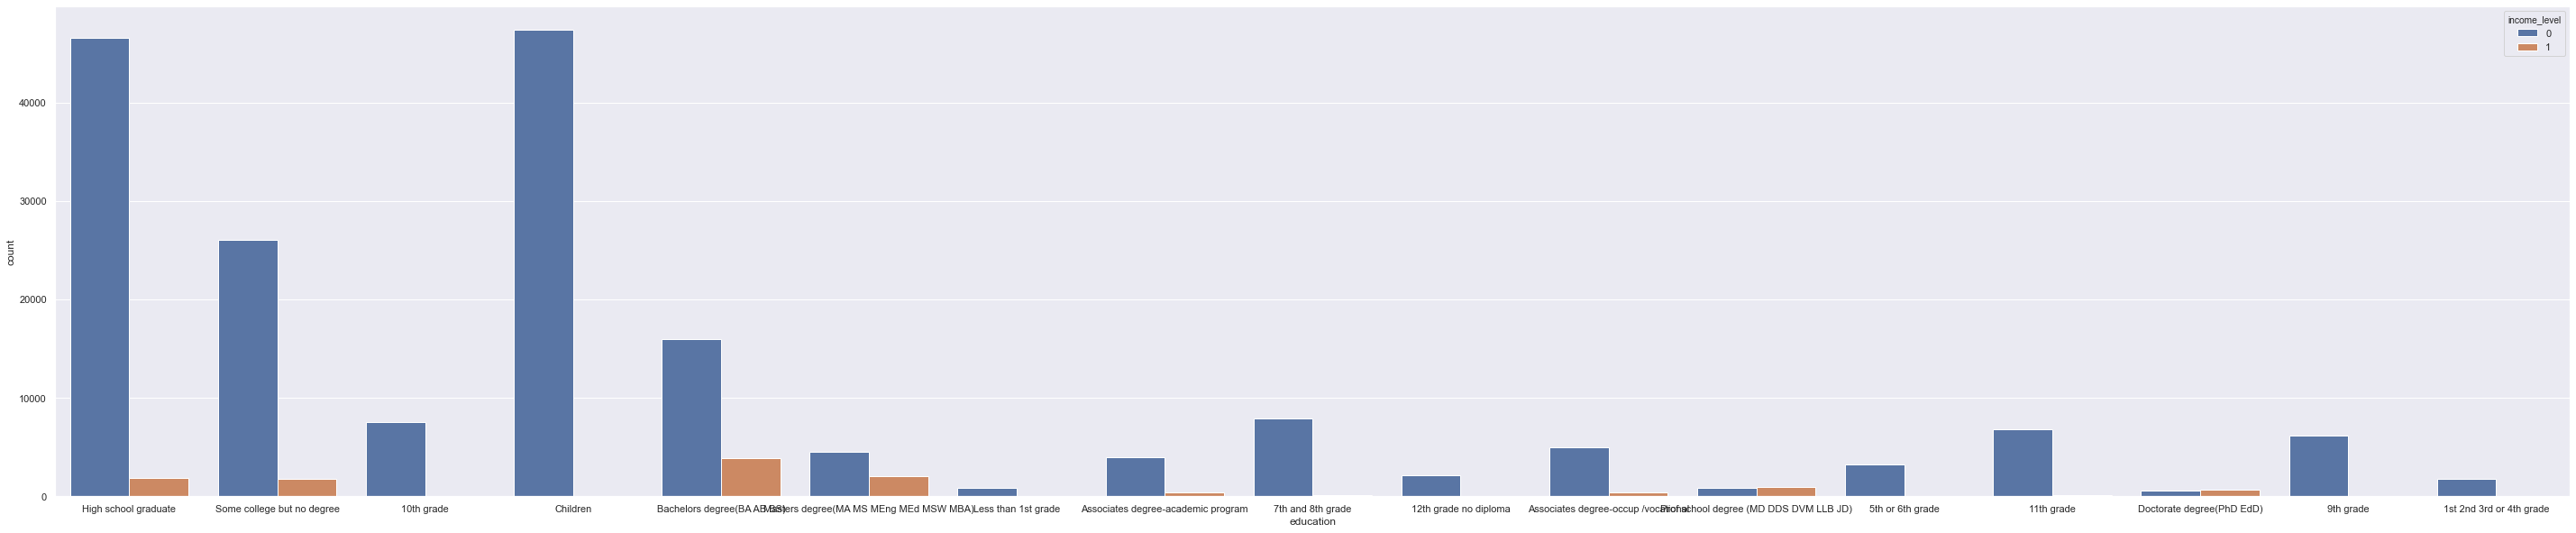

In [38]:
# education and income_level

sns.set(rc={'figure.figsize':(50,10)})
sns.countplot(x='education',hue='income_level',data=income_features)

In [41]:
income_features['education'].value_counts()

High school graduate                      48407
Children                                  47422
Some college but no degree                27820
Bachelors degree(BA AB BS)                19865
7th and 8th grade                          8007
10th grade                                 7557
11th grade                                 6876
Masters degree(MA MS MEng MEd MSW MBA)     6541
9th grade                                  6230
Associates degree-occup /vocational        5358
Associates degree-academic program         4363
5th or 6th grade                           3277
12th grade no diploma                      2126
1st 2nd 3rd or 4th grade                   1799
Prof school degree (MD DDS DVM LLB JD)     1793
Doctorate degree(PhD EdD)                  1263
Less than 1st grade                         819
Name: education, dtype: int64

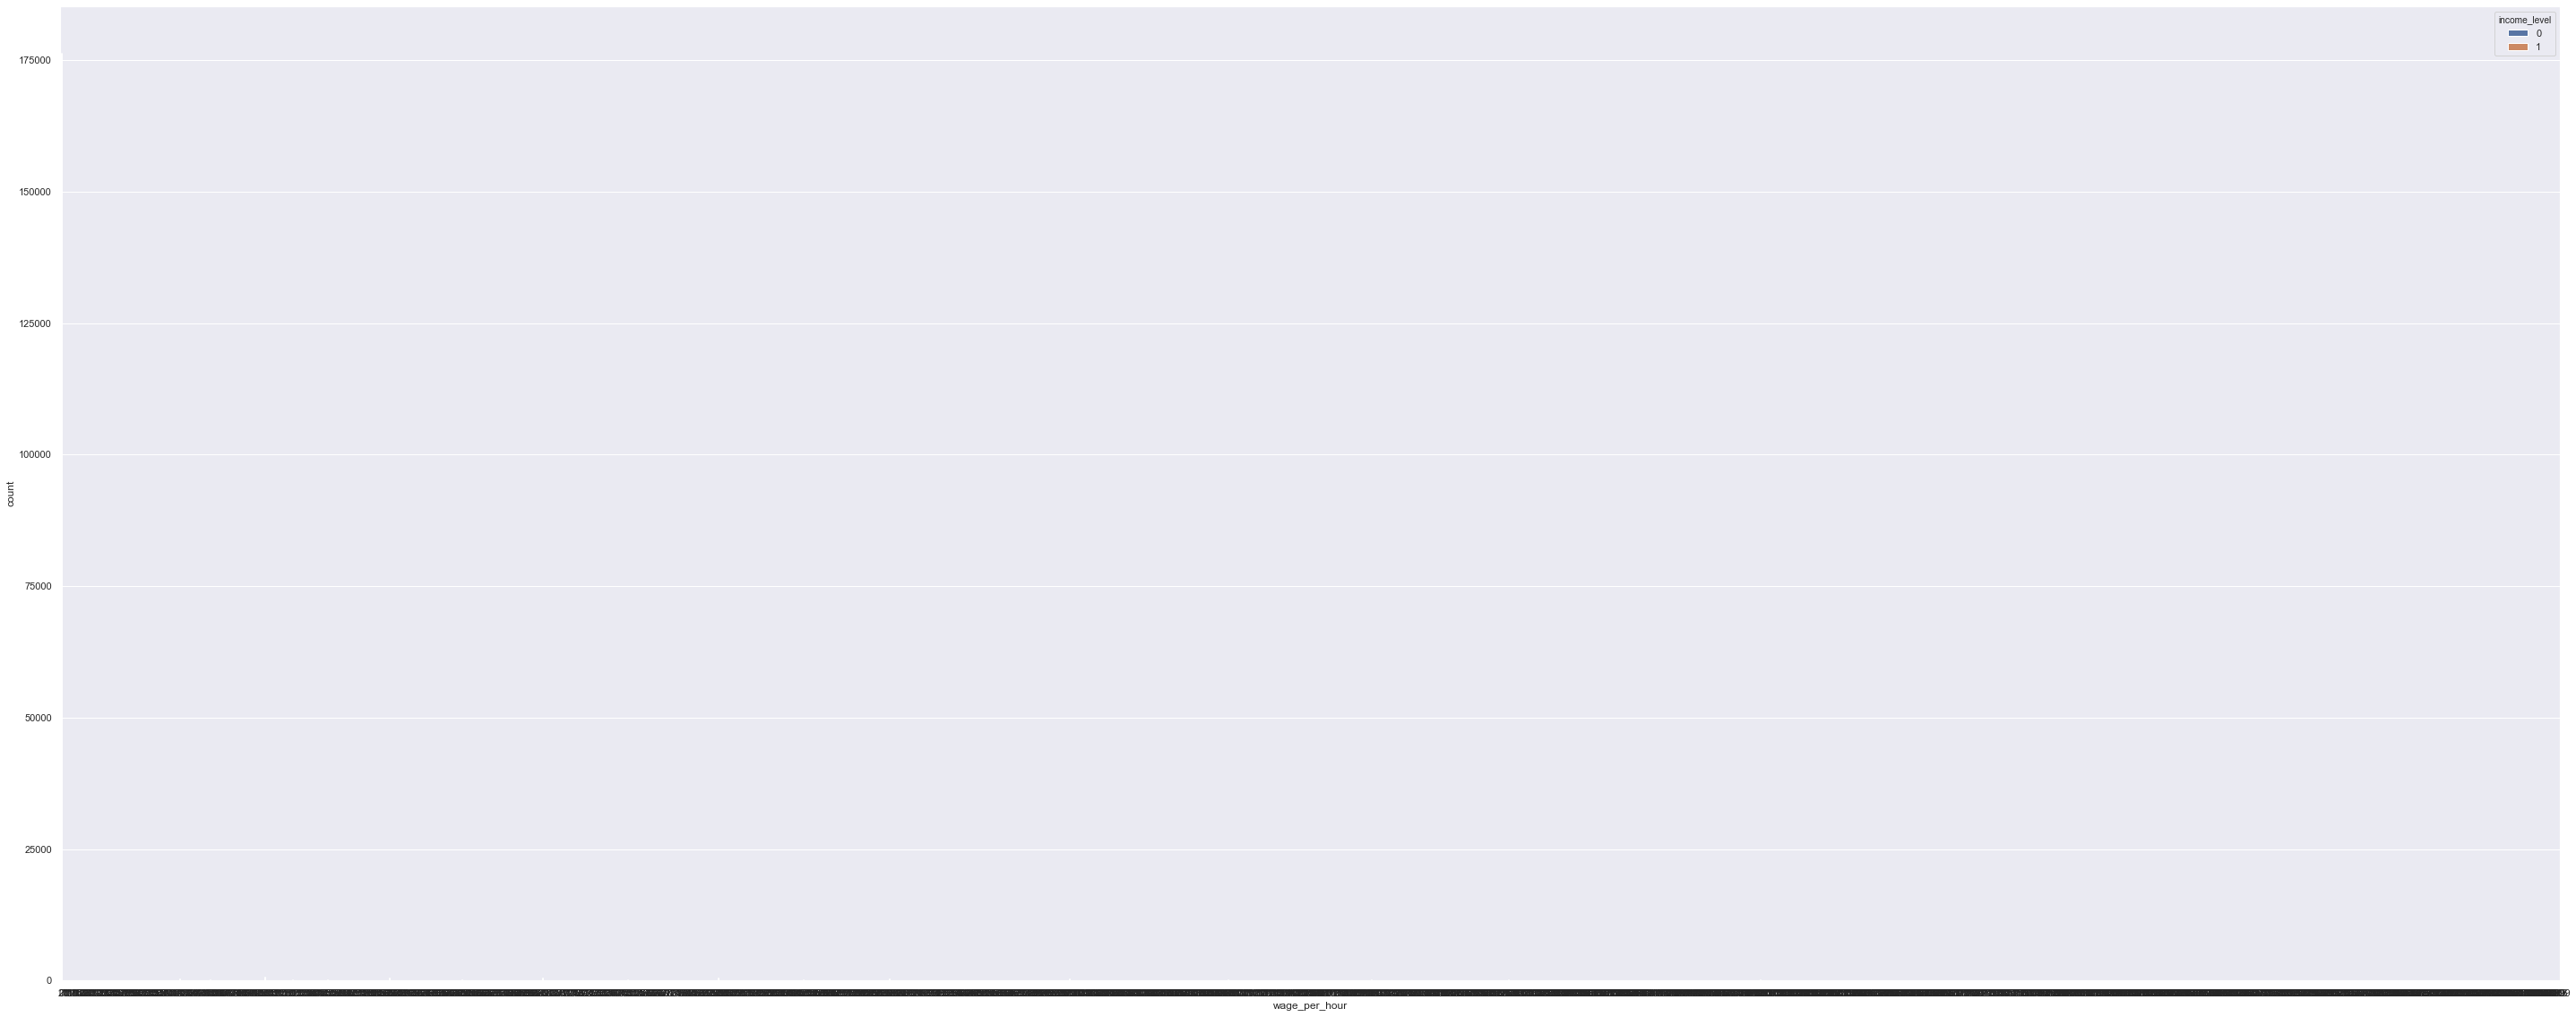

In [42]:
sns.set(rc={'figure.figsize':(50,20)})
sns.countplot(x='wage_per_hour',hue='income_level',data=income_features)

In [46]:
income_features['wage_per_hour'].nunique()

1240

In [80]:
# dfff=income_features.groupby('wage_per_hour')['income_level']
df=income_features[income_features['income_level']==1]
df['wage_per_hour'].quantile(0.9558)
# df.describe()

450.0

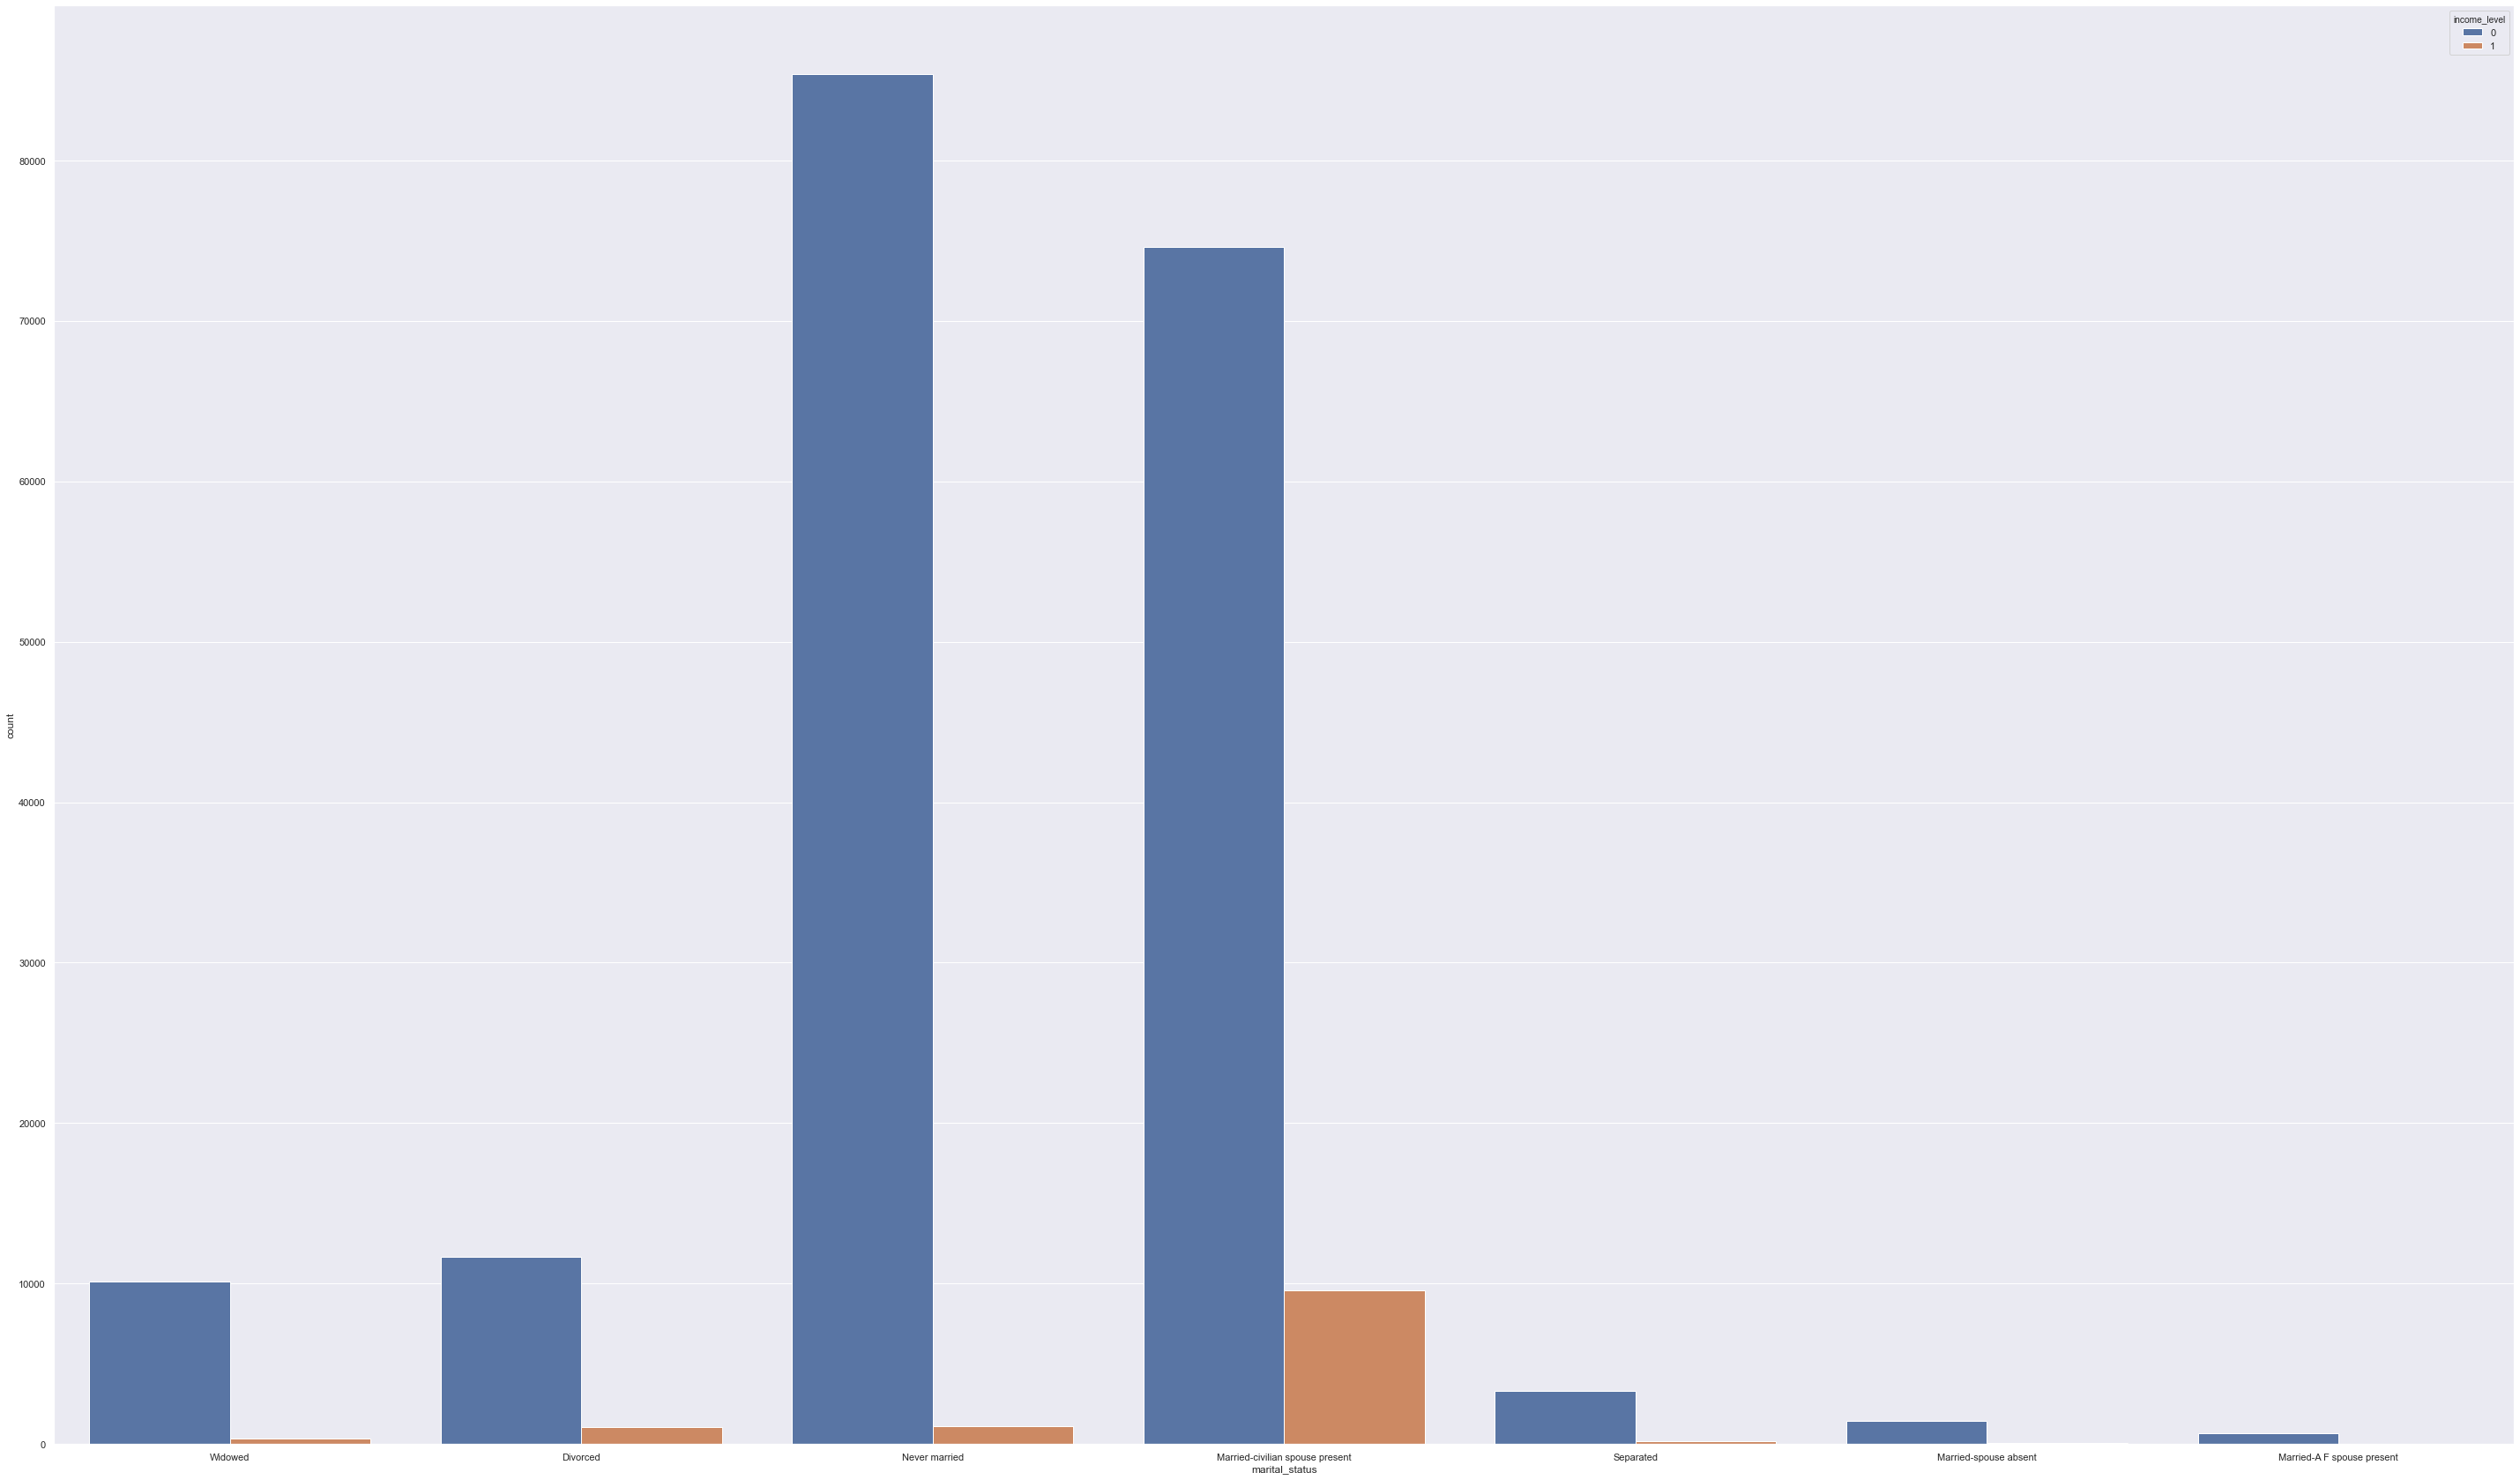

In [82]:
sns.set(rc={'figure.figsize':(50,30)})
sns.countplot(x='marital_status',hue='income_level',data=income_features)

In [ ]:
sns.catplot(x="marital_status", y="wage_per_hour", hue="income_level", kind="swarm", data=income_features);

In [84]:
income_features['marital_status'].unique()

array(['Widowed', 'Divorced', 'Never married',
       'Married-civilian spouse present', 'Separated',
       'Married-spouse absent', 'Married-A F spouse present'],
      dtype=object)

In [24]:
pd.reset_option('max_columns',1)


In [33]:
income_features['age'].unique()

array([73, 58, 18,  9, 10, 48, 42, 28, 47, 34,  8, 32, 51, 46, 26, 13, 39,
       16, 35, 12, 27, 56, 55,  2,  1, 37,  4, 63, 25, 81, 11, 30,  7, 66,
       84, 52,  5, 36, 72, 61, 41, 90, 49,  6,  0, 33, 57, 50, 24, 17, 53,
       40, 54, 22, 29, 85, 38, 76, 21, 31, 74, 19, 15,  3, 43, 68, 71, 45,
       62, 23, 69, 75, 44, 59, 60, 64, 65, 70, 67, 78, 20, 14, 83, 86, 89,
       77, 79, 82, 80, 87, 88], dtype=int64)

In [25]:
income_features

,age,education,wage_per_hour,marital_status,sex,tax_filer_status,country_self,citizenship,weeks_worked_in_year,income_level
0,73,High school graduate,0,Widowed,Female,Nonfiler,United-States,Native- Born in the United States,0,0
1,58,Some college but no degree,0,Divorced,Male,Head of household,United-States,Native- Born in the United States,52,0
2,18,10th grade,0,Never married,Female,Nonfiler,Vietnam,Foreign born- Not a citizen of U S,0,0
3,9,Children,0,Never married,Female,Nonfiler,United-States,Native- Born in the United States,0,0
4,10,Children,0,Never married,Female,Nonfiler,United-States,Native- Born in the United States,0,0
...,...,...,...,...,...,...,...,...,...,...
199518,87,7th and 8th grade,0,Married-civilian spouse present,Male,Joint both 65+,United-States,Native- Born in the United States,0,0
199519,65,11th grade,0,Married-civilian spouse present,Male,Joint one under 65 & one 65+,United-States,Native- Born in the United States,52,0
199520,47,Some college but no degree,0,Married-civilian spouse present,Male,Joint both under 65,Germany,Foreign born- U S citizen by naturalization,52,0
199521,16,10th grade,0,Never married,Female,Nonfiler,United-States,Native- Born in the United States,0,0


In [23]:
income_features['income_level'].value_counts()

0    187141
1     12382
Name: income_level, dtype: int64

In [29]:
# pd.set_options(“max_colwidth”,2)
pd.set_option('max_colwidth', None)
income_features[['age', 'income_level']]

,age,income_level
0,73,0
1,58,0
2,18,0
3,9,0
4,10,0
...,...,...
199518,87,0
199519,65,0
199520,47,0
199521,16,0


In [8]:
df_income.nunique()

age                                   91
class_of_worker                        9
industry_code                         52
occupation_code                       47
education                             17
wage_per_hour                       1240
enrolled_in_edu_inst_lastwk            3
marital_status                         7
major_industry_code                   24
major_occupation_code                 15
race                                   5
hispanic_origin                        9
sex                                    2
member_of_labor_union                  3
reason_for_unemployment                6
full_parttime_employment_stat          8
capital_gains                        132
capital_losses                       113
dividend_from_Stocks                1478
tax_filer_status                       6
region_of_previous_residence           6
state_of_previous_residence           50
d_household_family_stat               38
d_household_summary                    8
migration_msa   

In [9]:
import missingno as msno

In [10]:
import matplotlib.pyplot as plt

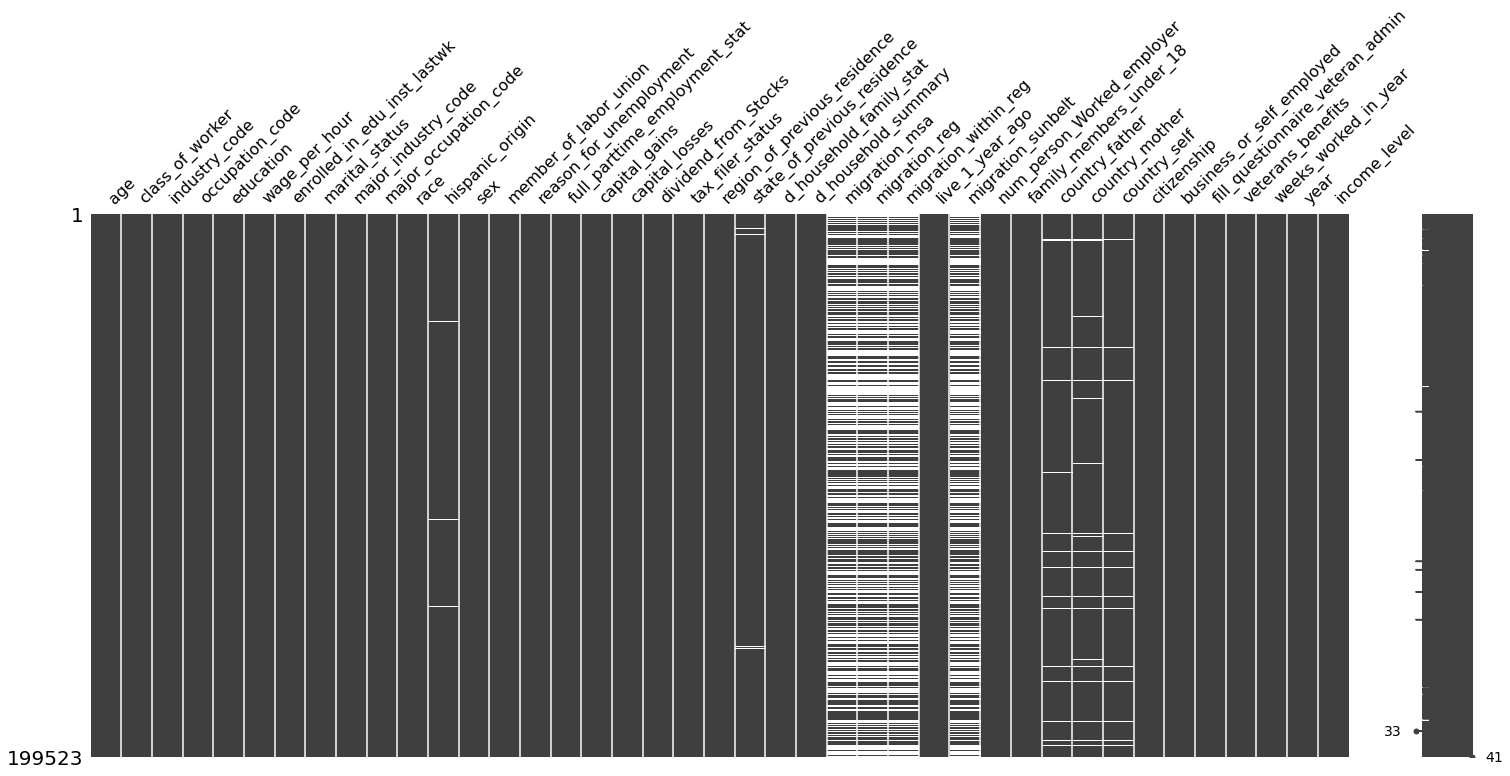

In [11]:
msno.matrix(df_income)
plt.show()

In [12]:
df_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 41 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   age                               199523 non-null  int64 
 1   class_of_worker                   199523 non-null  object
 2   industry_code                     199523 non-null  int64 
 3   occupation_code                   199523 non-null  int64 
 4   education                         199523 non-null  object
 5   wage_per_hour                     199523 non-null  int64 
 6   enrolled_in_edu_inst_lastwk       199523 non-null  object
 7   marital_status                    199523 non-null  object
 8   major_industry_code               199523 non-null  object
 9   major_occupation_code             199523 non-null  object
 10  race                              199523 non-null  object
 11  hispanic_origin                   198649 non-null  object
 12  se

In [13]:
df_income.isna().sum()

age                                     0
class_of_worker                         0
industry_code                           0
occupation_code                         0
education                               0
wage_per_hour                           0
enrolled_in_edu_inst_lastwk             0
marital_status                          0
major_industry_code                     0
major_occupation_code                   0
race                                    0
hispanic_origin                       874
sex                                     0
member_of_labor_union                   0
reason_for_unemployment                 0
full_parttime_employment_stat           0
capital_gains                           0
capital_losses                          0
dividend_from_Stocks                    0
tax_filer_status                        0
region_of_previous_residence            0
state_of_previous_residence           708
d_household_family_stat                 0
d_household_summary               

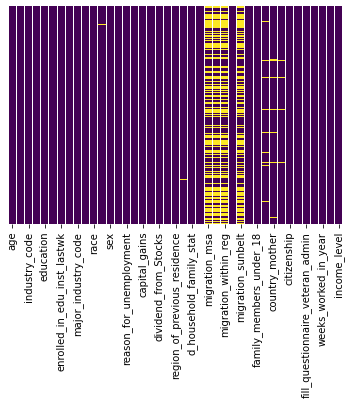

In [14]:
#Missing values using seaborn
import seaborn as sns
sns.heatmap(df_income.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [15]:
#Total missing values
df_income.isna().sum()

age                                     0
class_of_worker                         0
industry_code                           0
occupation_code                         0
education                               0
wage_per_hour                           0
enrolled_in_edu_inst_lastwk             0
marital_status                          0
major_industry_code                     0
major_occupation_code                   0
race                                    0
hispanic_origin                       874
sex                                     0
member_of_labor_union                   0
reason_for_unemployment                 0
full_parttime_employment_stat           0
capital_gains                           0
capital_losses                          0
dividend_from_Stocks                    0
tax_filer_status                        0
region_of_previous_residence            0
state_of_previous_residence           708
d_household_family_stat                 0
d_household_summary               

In [16]:
# seperating 9 missing columns out of 41 columns
df_null_columns = df_income[['hispanic_origin','state_of_previous_residence','migration_msa','migration_reg','migration_within_reg','migration_sunbelt','country_father','country_mother','country_self']]

In [17]:
df_null_columns.shape

(199523, 9)

In [18]:
# saving missing values in to excel
df_null_excel = df_null_columns.to_excel('df_null_columns.xlsx')

In [19]:
# Non missing values
df_non_miising_values = df_income.drop(df_null_columns,axis=1)



In [20]:
df_non_miising_values.shape

(199523, 32)

In [21]:
df_non_miising_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 32 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   age                               199523 non-null  int64 
 1   class_of_worker                   199523 non-null  object
 2   industry_code                     199523 non-null  int64 
 3   occupation_code                   199523 non-null  int64 
 4   education                         199523 non-null  object
 5   wage_per_hour                     199523 non-null  int64 
 6   enrolled_in_edu_inst_lastwk       199523 non-null  object
 7   marital_status                    199523 non-null  object
 8   major_industry_code               199523 non-null  object
 9   major_occupation_code             199523 non-null  object
 10  race                              199523 non-null  object
 11  sex                               199523 non-null  object
 12  me

In [63]:
# for i in data_non_missing_numrical.columns:
#     sns.boxplot(data=data_non_missing_numrical[i])
# plt.show()

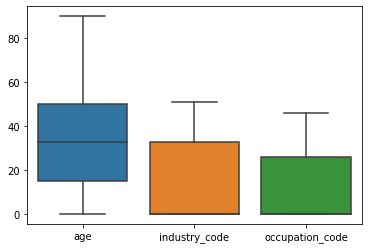

In [53]:
import seaborn as sns

# df_non_miising_values.plot(kind='box')
data_non_missing_numrical =df_non_miising_values[['age','industry_code','occupation_code']]
sns.boxplot(data=data_non_missing_numrical)

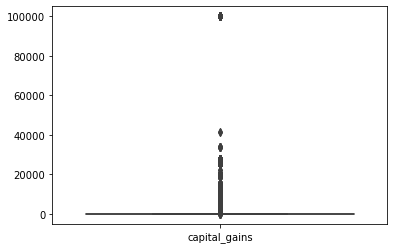

In [59]:
data_non_missing_numrical_1 =df_non_miising_values[['capital_gains']]
sns.boxplot(data=data_non_missing_numrical_1)

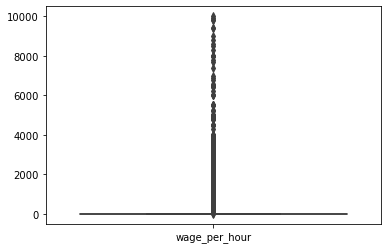

In [64]:
data_non_missing_numrical_3 =df_non_miising_values[['wage_per_hour']]
sns.boxplot(data=data_non_missing_numrical_3)

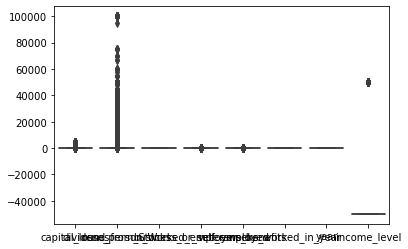

In [65]:
data_non_missing_numrical_4 =df_non_miising_values[['capital_losses','dividend_from_Stocks','num_person_Worked_employer','business_or_self_employed','veterans_benefits','weeks_worked_in_year','year','income_level']]
sns.boxplot(data=data_non_missing_numrical_4)

In [ ]:
df_income['income_level'].value_counts()

In [38]:
# converting -50000 to 0 and 50000 to 1

df_non_miising_values['income_level'].replace(to_replace=[-50000, 50000], value=[0, 1], inplace=True)

In [42]:
df_non_miising_values['income_level'].value_counts()

0    187141
1     12382
Name: income_level, dtype: int64

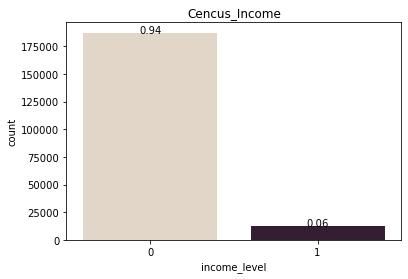

In [49]:
# sns.catplot(x="income_level", kind="bar", data=df_non_miising_values)
total = float(len(df_non_miising_values))
ax= sns.countplot(x="income_level",  palette="ch:.25", data=df_non_miising_values)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 
plt.title('Cencus_Income')
plt.show()

In [36]:
df_non_miising_values['income_level'].dtype

dtype('int64')

In [6]:
df_income.describe()

,age,industry_code,occupation_code,wage_per_hour,capital_gains,capital_losses,dividend_from_Stocks,num_person_Worked_employer,business_or_self_employed,veterans_benefits,weeks_worked_in_year,year,income_level
count,199523.000000,199523.000000,199523.000000,199523.000000,199523.00000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000
mean,34.494199,15.352320,11.306556,55.426908,434.71899,37.313788,197.529533,1.956180,0.175438,1.514833,23.174897,94.499672,-43794.199165
std,22.310895,18.067129,14.454204,274.896454,4697.53128,271.896428,1984.163658,2.365126,0.553694,0.851473,24.411488,0.500001,24126.148404
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.000000,-50000.000000
25%,15.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,94.000000,-50000.000000
50%,33.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,2.000000,8.000000,94.000000,-50000.000000
75%,50.000000,33.000000,26.000000,0.000000,0.00000,0.000000,0.000000,4.000000,0.000000,2.000000,52.000000,95.000000,-50000.000000
max,90.000000,51.000000,46.000000,9999.000000,99999.00000,4608.000000,99999.000000,6.000000,2.000000,2.000000,52.000000,95.000000,50000.000000


In [16]:
df_income['income_level'].value_counts()/df_income.shape[0]

-50000    0.937942
 50000    0.062058
Name: income_level, dtype: float64

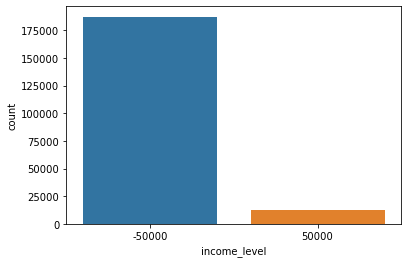

In [17]:
sns.countplot(df_income['income_level'],data=df_income)

In [10]:
sns.heatmap(df_income ,cmap='RdYlGn_r', linewidths=0.5, annot=True)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [8]:
import seaborn as sns